In [38]:
import pandas as pd
import os
import scanpy as sc
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=200)
                         
import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

['default', 'despine']


In [6]:
output_dir = "/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/stability_analysis"

In [7]:
metrics = pd.read_csv(os.path.join(output_dir, f"stability_metrics_gene.csv"))

In [8]:
metrics

,Unnamed: 0,gene_omitted,sink_div
0,0,Robo2,1.078618e-01
1,0,Hnf1aos1,3.596102e-02
2,0,Neurog3,1.767870e-01
3,0,Tinagl1,9.846196e-03
4,0,Irx2,1.299115e-02
...,...,...,...
995,0,Runx1,1.958013e-05
996,0,Thrb,3.558263e-03
997,0,Gm12153,2.980232e-08
998,0,Gm15873,2.980232e-08


In [9]:
import moscot

In [10]:
tfs = moscot.utils.data.transcription_factors("mouse")

In [13]:
metrics["TF"] = metrics.apply(lambda x: x["gene_omitted"] in tfs, axis=1)

In [14]:
metrics["TF"].sum()

91

In [42]:
tf_metrics = metrics[metrics["TF"] == True].sort_values(by="sink_div")[-9:]

In [43]:
marker_genes = tf_metrics.gene_omitted.values

In [44]:
tf_metrics

,Unnamed: 0,gene_omitted,sink_div,TF
333,0,Sox4,0.134913,True
27,0,Mctp2,0.135933,True
193,0,Meis1,0.174344,True
2,0,Neurog3,0.176787,True
815,0,Sim1,0.177038,True
802,0,Etv1,0.198849,True
588,0,Cbfa2t2,0.209794,True
858,0,Cers6,0.242787,True
590,0,Prdm16,0.322497,True


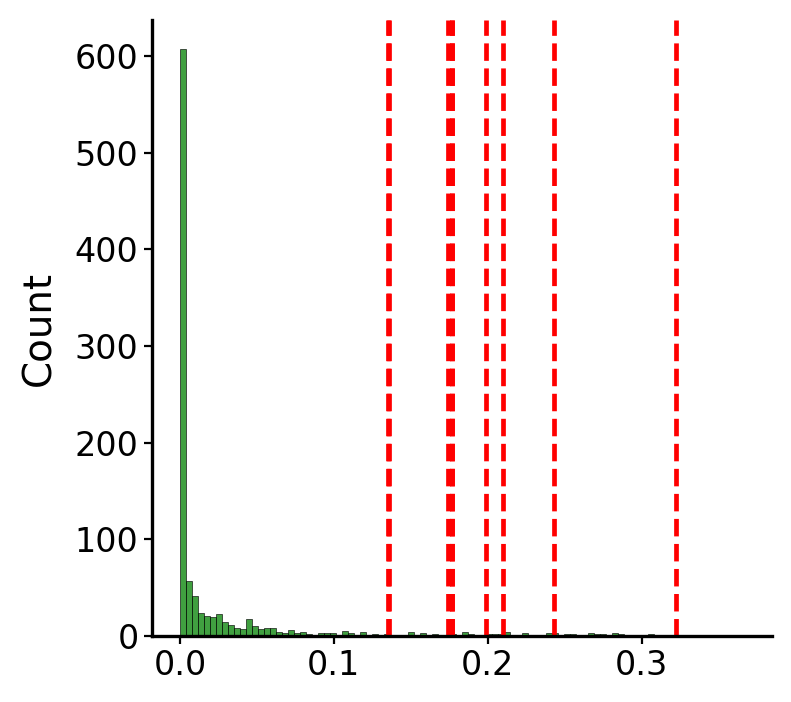

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
metrics_marker_genes = metrics[metrics.gene_omitted.isin(marker_genes)]

sns.histplot(metrics.sink_div.values, color="green")

for i in range(len(metrics_marker_genes)):
    plt.axvline(x=metrics_marker_genes.iloc[i,:].sink_div, color='r', linestyle='--')
    
plt.show()

In [46]:
len(metrics_marker_genes)

9

In [49]:
list(tf_metrics.gene_omitted)

['Sox4',
 'Mctp2',
 'Meis1',
 'Neurog3',
 'Sim1',
 'Etv1',
 'Cbfa2t2',
 'Cers6',
 'Prdm16']